In [1]:
#Import Package
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 12.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=c3d3d80d1122eff21fb6e4c522ba84012211bf81e1c6c92687d33a71b36119e7
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [2]:
#Importing Libraries
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


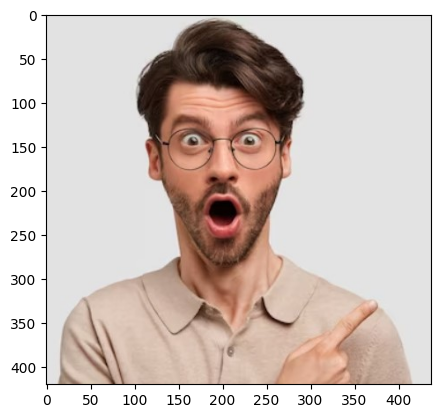

In [3]:
#Load the image
import cv2
import matplotlib.pyplot as plt
image1=cv2.imread("/content/surprised-man.jpg")
plt.imshow(image1[:,:,::-1])
plt.show()

In [4]:
# Analyze the image
result=DeepFace.analyze(image1, actions = ['emotion'])

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 11.8MB/s]
Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


In [5]:
#Final Result
print(result)

[{'emotion': {'angry': 1.9804409501222864e-08, 'disgust': 1.4533232167194248e-18, 'fear': 0.0015516083294642158, 'happy': 1.2378050806560736e-07, 'sad': 1.8454771697333696e-16, 'surprise': 99.99845027923584, 'neutral': 1.1992036221436384e-24}, 'dominant_emotion': 'surprise', 'region': {'x': 107, 'y': 71, 'w': 181, 'h': 181}}]


In [14]:

import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [38]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
     async function takePhoto(quality) {
       const div = document.createElement('div');
       const capture = document.createElement('button');
       capture.textContent = 'Capture';
       div.appendChild(capture);

       const video = document.createElement('video');
       video.style.display = 'block';
       const stream = await navigator.mediaDevices.getUserMedia({video: true});

       document.body.appendChild(div);
       div.appendChild(video);
       video.srcObject = stream;
       await video.play();

       // Resize the photo to fit the video element
       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

       // Wait for the capture to be clicked
       await new  Promise((resolve) => capture.onclick = resolve);

       const canvas = document.createElement('canvas');
       canvas.width = video.videoWidth;
       canvas.height = video.videoHeight;
       canvas.getContext('2d').drawImage(video, 0, 0);
       stream.getVideoTracks()[0].stop();
       div.remove();
       return canvas.toDataURL('/content/photo.jpg', quality);
     }
''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [39]:
image_file = take_photo()

<IPython.core.display.Javascript object>

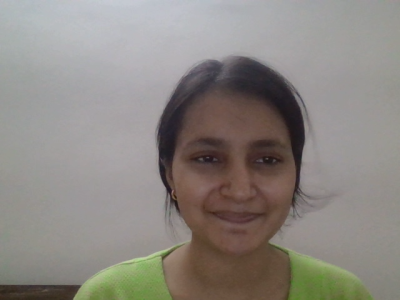

In [46]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize the image
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w, h)
cv2_imshow(image)

In [41]:
result = DeepFace.analyze(image, actions = ['emotions'])

Action: emotions: 100%|██████████| 1/1 [00:00<00:00, 225.04it/s]


In [47]:
print(result)

[{'region': {'x': 155, 'y': 97, 'w': 162, 'h': 162}}]
